In [4]:
#Code Reference
#[1]Author: https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
#[2]Author: https://www.kaggle.com/sinakhorami/titanic-best-working-classifier
#[3]Author: Jeff Delaney, 2016, Url:https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish

import pandas as pd;
import numpy as np;
import re;
import sklearn;
import seaborn as sns;
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from time import time
import itertools
import matplotlib.pyplot as plt
#import fancyimpute as fi
%matplotlib inline

train_filepath = "train.csv";
test_filepath = "test.csv";

train = pd.read_csv(train_filepath);
test = pd.read_csv(test_filepath);
combine = [train, test];

print("Training Set shape" , train.shape, "Test set shape",test.shape)
print(train.isnull().any())
print(test.isnull().any())

ImportError: No module named 'fancyimpute'

In [5]:
new_pd_column = ['id','BMI','age_group','gender','Average_Sedentary_Time']
summary_pd = pd.Dataframe(columns =new_pd_column)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [9]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler

In [10]:
import fancyimpute

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validation
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

ImportError: cannot import name 'cross_validation'

# Explaination for each columns
Embarked(C = Cherbourg; Q = Queenstown; S = Southampton)
Sibsp(Number of Siblings/Spouses Aboard)
Pclass(1 = 1st; 2 = 2nd; 3 = 3rd)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
imp_train = train.copy(deep=True)

In [15]:
#Fancyimpute fill missing data

imp_train[imp_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
fancyimpute.knn.KNN(k=3).fit_transform(imp_train[['Age', 'Survived', 'Pclass']])

Imputing row 1/891 with 0 missing, elapsed time: 0.208
Imputing row 101/891 with 0 missing, elapsed time: 0.211
Imputing row 201/891 with 0 missing, elapsed time: 0.212
Imputing row 301/891 with 1 missing, elapsed time: 0.214
Imputing row 401/891 with 0 missing, elapsed time: 0.215
Imputing row 501/891 with 0 missing, elapsed time: 0.217
Imputing row 601/891 with 0 missing, elapsed time: 0.218
Imputing row 701/891 with 0 missing, elapsed time: 0.220
Imputing row 801/891 with 0 missing, elapsed time: 0.221


array([[22.,  0.,  3.],
       [38.,  1.,  1.],
       [26.,  1.,  3.],
       ...,
       [29.,  0.,  3.],
       [26.,  1.,  1.],
       [32.,  0.,  3.]])

In [17]:
imp_train.loc[[61,829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
imp_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## The following code will do the data converting


In [19]:
train['Name_length'] = train['Name'].apply(len);#[1]
test['Name_length'] = test['Name'].apply(len);#[1]
train["Embarked"] = train["Embarked"].fillna("C") #Fill all null with S
test["Embarked"] = test["Embarked"].fillna('S')

#transform the feature to numerical value[2]
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

#split the fare by ticket number


#build up family size feature[2]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
#build up a binary feature based on family size[1]
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

#re-engineering the Fare feature[2]
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())    
train['FareCategory'] = pd.qcut(train['Fare'], 4)
print (train[['FareCategory', 'Survived']].groupby(['FareCategory'], as_index=False).mean())


      FareCategory  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [20]:
train.isnull().any()

PassengerId     False
Survived        False
Pclass          False
Name            False
Sex             False
Age              True
SibSp           False
Parch           False
Ticket          False
Fare            False
Cabin            True
Embarked        False
Name_length     False
Has_Cabin       False
FamilySize      False
IsAlone         False
FareCategory    False
dtype: bool

In [21]:
#Engineering new category Age and fill non cell with random number by given mean and std [2]
for dataset in combine:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
train['AgeCategory'] = pd.cut(train['Age'], 5)


def titleName(name):    
    searchTitle = re.search(' ([A-Za-z]+)\.', name)
    if searchTitle:
        return searchTitle.group(1)
    return ""

# Engineering a new feature called title
for dataset in combine:
    dataset['Title'] = dataset['Name'].apply(titleName)
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


C:\ProgramData\Anaconda3\envs\pytest36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [22]:
train.sort_values("FamilySize").tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,FareCategory,AgeCategory,Title
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2,4,2,347082,31.2750,NaN,S,33,0,7,0,"(31.0, 512.329]","(-0.08, 16.0]",Miss
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11,4,2,347082,31.2750,NaN,S,33,0,7,0,"(31.0, 512.329]","(-0.08, 16.0]",Miss
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5,4,2,347077,31.3875,NaN,S,30,0,7,0,"(31.0, 512.329]","(-0.08, 16.0]",Miss
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17,4,2,3101281,7.9250,NaN,S,31,0,7,0,"(7.91, 14.454]","(16.0, 32.0]",Miss
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3,4,2,347077,31.3875,NaN,S,33,0,7,0,"(31.0, 512.329]","(-0.08, 16.0]",Master
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,4,2,347082,31.2750,NaN,S,39,0,7,0,"(31.0, 512.329]","(-0.08, 16.0]",Master
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39,1,5,347082,31.2750,NaN,S,57,0,7,0,"(31.0, 512.329]","(32.0, 48.0]",Mrs
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16,5,2,CA 2144,46.9000,NaN,S,26,0,8,0,"(31.0, 512.329]","(-0.08, 16.0]",Miss
59,60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9000,NaN,S,34,0,8,0,"(31.0, 512.329]","(-0.08, 16.0]",Master
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43,1,6,CA 2144,46.9000,NaN,S,39,0,8,0,"(31.0, 512.329]","(32.0, 48.0]",Mrs


In [23]:
for dataset in combine:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping).astype(int)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
       
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']  = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age']= 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4


In [24]:

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)
train = train.drop(['AgeCategory', 'FareCategory'], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,23,0,2,0,1
1,1,1,0,2,0,3,1,51,1,2,0,3
2,1,3,0,1,0,1,0,22,0,1,1,2
3,1,1,0,2,0,3,0,44,1,2,0,3
4,0,3,1,2,0,1,0,24,0,1,1,1


In [10]:
t1 = train.astype(float).corr();
train.astype(float).corr()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
Survived,1.000000,-0.338481,-0.543351,-0.063943,0.081629,0.295875,0.111203,0.332350,0.316912,0.016639,-0.203367,0.407753
Pclass,-0.338481,1.000000,0.131900,-0.327180,0.018443,-0.628459,0.040138,-0.220001,-0.725541,0.065997,0.135207,-0.173929
Sex,-0.543351,0.131900,1.000000,0.084478,-0.245489,-0.248940,-0.121266,-0.448759,-0.140391,-0.200988,0.303646,-0.502713
Age,-0.063943,-0.327180,0.084478,1.000000,-0.150482,0.069384,0.004789,0.050715,0.243934,-0.217146,0.143827,-0.062223
Parch,0.081629,0.018443,-0.245489,-0.150482,1.000000,0.393048,-0.080277,0.252282,0.036987,0.783111,-0.583398,0.315784
Fare,0.295875,-0.628459,-0.248940,0.069384,0.393048,1.000000,-0.086303,0.334176,0.497108,0.465815,-0.568942,0.341665
Embarked,0.111203,0.040138,-0.121266,0.004789,-0.080277,-0.086303,1.000000,-0.106512,0.020243,-0.082200,0.020660,0.048012
Name_length,0.332350,-0.220001,-0.448759,0.050715,0.252282,0.334176,-0.106512,1.000000,0.190943,0.238820,-0.406800,0.479221
Has_Cabin,0.316912,-0.725541,-0.140391,0.243934,0.036987,0.497108,0.020243,0.190943,1.000000,-0.009175,-0.158029,0.133390
FamilySize,0.016639,0.065997,-0.200988,-0.217146,0.783111,0.465815,-0.082200,0.238820,-0.009175,1.000000,-0.690922,0.342039


In [3]:
#Print out variable correlation rates
hcp = np.round((t1[ t1.abs()>0.5][t1.abs()<0.999].count().sum()/(t1.shape[0]*t1.shape[1]-t1.shape[0]) * 100))
mcp = np.round((t1[ t1.abs()>0.3][t1.abs()<0.49].count().sum()/(t1.shape[0]*t1.shape[1]-t1.shape[0]) * 100))
lcp = np.round((t1[ t1.abs()>0.0][t1.abs()<0.29].count().sum()/(t1.shape[0]*t1.shape[1]-t1.shape[0]) * 100))
print("Percentage of High Correlation", hcp,"%", "Medium rate",mcp,"%","Low rate",lcp,"%");

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

NameError: name 't1' is not defined

## Define some functions can print out confusion matrix

In [12]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Build up the Kfold dataset for train and validation
test data set for performance mea

In [13]:

#Build up our feature
train_features_forest = train[["Pclass", "Sex","Age","Parch","Fare","Embarked","Name_length","Has_Cabin", "FamilySize", "IsAlone","Title"]].values
test_feature = test[["Pclass", "Sex","Age","Parch","Fare","Embarked","Name_length","Has_Cabin", "FamilySize", "IsAlone","Title"]].values

#Build up dataset for KFold validation

X_KFold = train_features_forest
y_KFold = train["Survived"]
num_test = 0.20 # 80% data for training, 20% data for testing 
X_train, X_test, y_train, y_test = train_test_split(X_KFold, y_KFold, test_size=num_test, random_state=23)

## KFold Accuracy Validation

In [14]:

scoring1 = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

k_fold = KFold(len(y_KFold), n_folds=10, shuffle=True, random_state=0)

def kfold_test_Accuracy(classifier,X_KFold,y_KFold):    
    scores = cross_validate(classifier, X_KFold, y_KFold, scoring='accuracy', cv=5, return_train_score=True)
    name = classifier.__class__.__name__
    print("Name is:",name)
    print(classifier)
    print("Accuracy is :", np.mean(scores['test_score']))


### RandomForest

In [15]:


#Choose the type of classifier. 
#RandomForeset
clf_rdf = RandomForestClassifier()
# Choose some parameter combinations to try
parameters = {'n_estimators': [ 20, 40, 50], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [ 5, 10], 
              'min_samples_split': [ 3, 5],
              'min_samples_leaf': [1,5,8]
             }
acc_scorer = make_scorer(accuracy_score)

# Run the grid search to find the best parameter
gs_rf = GridSearchCV(clf_rdf, parameters, scoring=acc_scorer)
gs_rf = gs_rf.fit(X_train, y_train)

#then set the clf with best estimator
clf_rdf = gs_rf.best_estimator_
clf_rdf.fit(X_train, y_train)
print("Best estimator found by grid search:")

print(gs_rf.best_estimator_)
t0 = time()
y_pred = clf_rdf.predict(X_test)
print("done in %0.3fs" % (time() - t0))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names="Survived")) # this is the weighted score
print(clf_rdf.feature_importances_)




Best estimator found by grid search:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
done in 0.000s
0.815642458101
             precision    recall  f1-score   support

          S       0.84      0.89      0.86       115
          u       0.77      0.69      0.73        64

avg / total       0.81      0.82      0.81       179

[ 0.0892347   0.21343311  0.05816317  0.02643251  0.0603868   0.04666832
  0.17537219  0.05448448  0.06912271  0.02492228  0.18177973]


C:\Users\VBVB\AppData\Local\conda\conda\envs\Pandas\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 8
  .format(len(labels), len(target_names))


In [16]:
kfold_test_Accuracy(clf_rdf,X_KFold,y_KFold)

Name is: RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy is : 0.835093395352


### SVM

In [17]:
#parameters for SVC

#param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
svc_param_grid = {'C': [1,2,3,4,5,6,7,8, 1e5],
             'gamma': [0.01, 0.02, 0.03, 0.04, 0.05,0.06,0.07,0.08, 0.1], }
clf_svc = SVC()
gs_svc = GridSearchCV(clf_svc, svc_param_grid,scoring=acc_scorer)

gs_svc.fit(X_train, y_train)
clf_svc = gs_svc.best_estimator_
y_pred = clf_svc.predict(X_test)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(gs_svc.best_estimator_)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names="Survived"))


done in 13.733s
Best estimator found by grid search:
SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.782122905028
             precision    recall  f1-score   support

          S       0.82      0.84      0.83       115
          u       0.70      0.67      0.69        64

avg / total       0.78      0.78      0.78       179



C:\Users\VBVB\AppData\Local\conda\conda\envs\Pandas\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 8
  .format(len(labels), len(target_names))


### Logistic Regression

In [18]:
#Logistic regression 

lgr_para = {
        'C': np.power(10.0, np.arange(-10, 10))
         , 'solver': ['newton-cg','sag','saga']
    }
clf_lgr = LogisticRegression(penalty='l2', random_state=777, max_iter=10000, tol=10)
gs_lgr = GridSearchCV(clf_lgr, lgr_para,scoring=acc_scorer, cv=10) #'roc_auc'
gs_lgr.fit(X_train, y_train)

t0=time();
clf_lgr = gs_lgr.best_estimator_
y_pred = clf_lgr.predict(X_test)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(gs_lgr.best_estimator_)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names="Survived"))


#print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

done in 0.000s
Best estimator found by grid search:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=777, solver='newton-cg', tol=10,
          verbose=0, warm_start=False)
0.787709497207
             precision    recall  f1-score   support

          S       0.82      0.85      0.84       115
          u       0.72      0.67      0.69        64

avg / total       0.79      0.79      0.79       179



C:\Users\VBVB\AppData\Local\conda\conda\envs\Pandas\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 8
  .format(len(labels), len(target_names))


In [19]:
print("Weighted F1_score is: ",sklearn.metrics.f1_score(y_test, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None))

print("Micro weighted F1_scroe is",sklearn.metrics.f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None))


Weighted F1_score is:  0.786099905581
Micro weighted F1_scroe is 0.765577612352


### Decision Tree

In [20]:
#Decision tree


param_grid = {'max_depth': np.arange(3, 10)}
clf_tree = DecisionTreeClassifier()
gs_tree = GridSearchCV(clf_tree, param_grid,scoring=acc_scorer)

gs_tree.fit(X_train, y_train)
print("Best estimator found for decision tree:")
print(gs_tree.best_estimator_)

clf_tree = gs_tree.best_estimator_

y_pred = gs_tree.predict(X_test)


print("Decision Tree GridSearch accuracy is:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names="Survived"))


Best estimator found for decision tree:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Decision Tree GridSearch accuracy is: 0.832402234637
             precision    recall  f1-score   support

          S       0.86      0.89      0.87       115
          u       0.78      0.73      0.76        64

avg / total       0.83      0.83      0.83       179



C:\Users\VBVB\AppData\Local\conda\conda\envs\Pandas\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 8
  .format(len(labels), len(target_names))


### Naive bayes

In [21]:

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

y_pred= clf_nb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names="Survived"))

0.798882681564
             precision    recall  f1-score   support

          S       0.87      0.81      0.84       115
          u       0.69      0.78      0.74        64

avg / total       0.81      0.80      0.80       179



C:\Users\VBVB\AppData\Local\conda\conda\envs\Pandas\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 8
  .format(len(labels), len(target_names))


### kNN

In [22]:

clf_kNN = KNeighborsClassifier(algorithm = 'brute')
parameters = {'n_neighbors':list(range(1, 31)) }
gs_kNN = GridSearchCV(clf_kNN, parameters, cv=5,scoring=acc_scorer)
gs_kNN.fit(X_train,y_train)
clf_kNN = gs_kNN.best_estimator_

y_preds = clf_kNN.predict(X_test)
print("Best estimator found for decision tree:")
print(gs_kNN.best_estimator_)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names="Survived"))

Best estimator found for decision tree:
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
0.798882681564
             precision    recall  f1-score   support

          S       0.87      0.81      0.84       115
          u       0.69      0.78      0.74        64

avg / total       0.81      0.80      0.80       179



C:\Users\VBVB\AppData\Local\conda\conda\envs\Pandas\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 8
  .format(len(labels), len(target_names))


### Adaboost

In [23]:

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }
clf_ABC = AdaBoostClassifier(base_estimator = clf_tree)

# run grid search
grid_search_ABC = GridSearchCV(clf_ABC, param_grid=param_grid, scoring=acc_scorer)
grid_search_ABC.fit(X_train,y_train)

print(grid_search_ABC.best_estimator_)
clf_ABC = grid_search_ABC.best_estimator_
y_preds = clf_ABC.predict(X_test)
print("Adaboost Accuracy is: ")
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names="Survived"))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1, random_state=None)
Adaboost Accuracy is: 
0.798882681564
             precision    recall  f1-score   support

          S       0.87      0.81      0.84       115
          u       0.69      0.78      0.74        64

avg / total       0.81      0.80      0.80       179



C:\Users\VBVB\AppData\Local\conda\conda\envs\Pandas\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 8
  .format(len(labels), len(target_names))


## Build up classifier for all features

In [24]:
#Wire up everything
final_clf_rdf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

final_cfl_svm = SVC(C=7, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.02, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

final_clf_lr = LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=777, solver='newton-cg', tol=10,
          verbose=0, warm_start=False)

final_clf_dc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

final_clf_kNN = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
final_clf_nb = GaussianNB()

final_clf_adb =AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1, random_state=None)
classifiers =[
    final_clf_rdf,
    final_cfl_svm,
    final_clf_lr,
    final_clf_dc,
    final_clf_kNN,
    final_clf_nb,
    final_clf_adb
]  

estimatedclfs = [clf_rdf,clf_svc,clf_lgr,clf_tree,clf_nb,clf_kNN,clf_ABC]


In [25]:
def kfold_test_Accuracy_loop(classifierlist,X_KFold,y_KFold):
    log_cols = ["Classifier", "Accuracy"]
    log = pd.DataFrame(columns=log_cols)
    for classifier in classifierlist:
        scores = cross_validate(classifier, X_KFold, y_KFold, scoring='accuracy', cv=5, return_train_score=True)
        name = classifier.__class__.__name__
        log.loc[len(log)] = [name,np.mean(scores['test_score'])]
    return log

def Accuracy_loop(classifierlist,X_KFold,y_KFold):
    log_cols = ["Classifier", "Accuracy"]
    log = pd.DataFrame(columns=log_cols)
    for classifier in classifierlist:
        
        y_pred = classifier.predict(X_KFold)
        score= accuracy_score(y_KFold, y_pred)
        name = classifier.__class__.__name__

        log.loc[len(log)] = [name,score]
    return log


In [26]:
trainlog = Accuracy_loop(estimatedclfs,X_KFold,y_KFold)
print("Train set Accuracy");
trainlog.head(10)

Train set Accuracy


,Classifier,Accuracy
0,RandomForestClassifier,0.913580
1,SVC,0.851852
2,LogisticRegression,0.819304
3,DecisionTreeClassifier,0.847363
4,GaussianNB,0.800224
5,KNeighborsClassifier,0.857464
6,AdaBoostClassifier,0.847363


In [27]:
test_y = test["Survived"]

testsetlog= Accuracy_loop(estimatedclfs,test_feature,test_y)
print("Test set Accuracy")
testsetlog.head(10)


Test set Accuracy


,Classifier,Accuracy
0,RandomForestClassifier,0.755981
1,SVC,0.753589
2,LogisticRegression,0.772727
3,DecisionTreeClassifier,0.772727
4,GaussianNB,0.724880
5,KNeighborsClassifier,0.734450
6,AdaBoostClassifier,0.772727


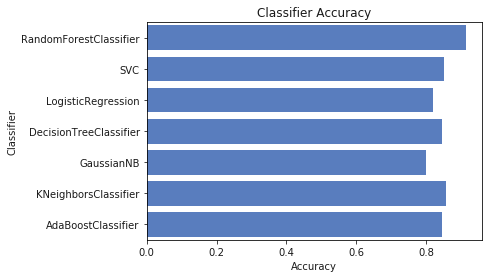

In [28]:

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=trainlog, color="b")

In [29]:
def test_measurement(classifierlist,X_train,y_train, XX_test,yy_test):
    pdcolumns = ['Model name','Accuracy','Recall','Precision','F1_score','AverageMethod']
    pd_result = pd.DataFrame(columns=pdcolumns)
    kf = KFold(y_train.shape[0], n_folds=5) 
    fold = 0
    for classifier in classifierlist:
        classifier.fit(X_train,y_train)
        name = classifier.__class__.__name__
        predictions = classifier.predict(XX_test) # calculated prediciton
        accuracy = accuracy_score(yy_test, predictions)
        recall_weighted = recall_score(yy_test, predictions,average='weighted')
        precision_weighted = precision_score(yy_test, predictions,average='weighted')
        f1_weighted = f1_score(yy_test, predictions,average='weighted')
        
        recall_nonweighted = recall_score(yy_test, predictions)
        precision_nonweighted = precision_score(yy_test, predictions)
        f1_nonweighted = f1_score(yy_test, predictions) 
        pd_result.loc[len(pd_result)] = [name,accuracy,recall_weighted,precision_weighted,f1_weighted,'weighted']
        pd_result.loc[len(pd_result)] = [name,accuracy,recall_nonweighted,precision_nonweighted,f1_nonweighted,'non weighted']
    return pd_result


In [30]:
#kfold test measurement
def kfold_test_measurement(classifierlist,X_KFold,y_KFold):
    pdcolumns = ['Model name','Accuracy','Recall','Precision','F1_score','AverageMethod']
    pd_result = pd.DataFrame(columns=pdcolumns)
    kf = KFold(y_train.shape[0], n_folds=10) 
    fold = 0
    for classifier in classifierlist:
        for train_index, test_index in kf:            
            fold += 1
            XX_train, XX_test = X_KFold[train_index], X_KFold[test_index]
            yy_train, yy_test = y_KFold[train_index], y_KFold[test_index]
            classifier.fit(XX_train,yy_train)    
            
            name = classifier.__class__.__name__
            predictions = classifier.predict(XX_test) # calculated prediciton
            accuracy = accuracy_score(yy_test, predictions)
            recall_weighted = recall_score(yy_test, predictions,average='weighted')
            precision_weighted = precision_score(yy_test, predictions,average='weighted')
            f1_weighted = f1_score(yy_test, predictions,average='weighted')            
            recall_nonweighted = recall_score(yy_test, predictions)
            precision_nonweighted = precision_score(yy_test, predictions)
            f1_nonweighted = f1_score(yy_test, predictions) 
            pd_result.loc[len(pd_result)] = [name,accuracy,recall_weighted,precision_weighted,f1_weighted,'weighted']
            pd_result.loc[len(pd_result)] = [name,accuracy,recall_nonweighted,precision_nonweighted,f1_nonweighted,'non weighted'] 
    return pd_result


In [31]:
#testpdresult = test_measurement(estimatedclfs,X_train,y_train, X_test,y_test)
trainpdresult = kfold_test_measurement(estimatedclfs,X_KFold,y_KFold)

In [32]:
print("Train Set measurement")
trainpdresult.groupby(['Model name','AverageMethod']).mean()

Train Set measurement


Accuracy    Recall  Precision  F1_score
Model name             AverageMethod                                         
AdaBoostClassifier     non weighted   0.786561  0.646835   0.757100  0.692979
                       weighted       0.786561  0.786561   0.786474  0.781661
DecisionTreeClassifier non weighted   0.787969  0.646835   0.761147  0.694425
                       weighted       0.787969  0.787969   0.788331  0.782980
GaussianNB             non weighted   0.776819  0.775753   0.682587  0.725400
                       weighted       0.776819  0.776819   0.786726  0.779325
KNeighborsClassifier   non weighted   0.764104  0.629428   0.728197  0.669733
                       weighted       0.764104  0.764104   0.766438  0.759560
LogisticRegression     non weighted   0.813204  0.731912   0.772855  0.749123
                       weighted       0.813204  0.813204   0.815028  0.812094
RandomForestClassifier non weighted   0.813224  0.695079   0.793041  0.738297
                       weighted       0.813224  0.813224   0.813590  0.810147
SVC                    non weighted   0.807590  0.715188   0.773230  0.739804
                       weighted       0.807590  0.807590   0.809057  0.805710

In [33]:
trainpdresult.groupby(['Model name','AverageMethod']).describe()

Accuracy                                \
                                        count      mean       std       min   
Model name             AverageMethod                                          
AdaBoostClassifier     non weighted      10.0  0.786561  0.024908  0.736111   
                       weighted          10.0  0.786561  0.024908  0.736111   
DecisionTreeClassifier non weighted      10.0  0.787969  0.025437  0.736111   
                       weighted          10.0  0.787969  0.025437  0.736111   
GaussianNB             non weighted      10.0  0.776819  0.040111  0.708333   
                       weighted          10.0  0.776819  0.040111  0.708333   
KNeighborsClassifier   non weighted      10.0  0.764104  0.034447  0.722222   
                       weighted          10.0  0.764104  0.034447  0.722222   
LogisticRegression     non weighted      10.0  0.813204  0.038712  0.746479   
                       weighted          10.0  0.813204  0.038712  0.746479   
RandomForestClassifier non weighted      10.0  0.813224  0.030986  0.760563   
                       weighted          10.0  0.813224  0.030986  0.760563   
SVC                    non weighted      10.0  0.807590  0.033669  0.746479   
                       weighted          10.0  0.807590  0.033669  0.746479   

                                                                              \
                                           25%       50%       75%       max   
Model name             AverageMethod                                           
AdaBoostClassifier     non weighted   0.774648  0.781690  0.804871  0.816901   
                       weighted       0.774648  0.781690  0.804871  0.816901   
DecisionTreeClassifier non weighted   0.774648  0.788732  0.804871  0.816901   
                       weighted       0.774648  0.788732  0.804871  0.816901   
GaussianNB             non weighted   0.747359  0.788732  0.802817  0.830986   
                       weighted       0.747359  0.788732  0.802817  0.830986   
KNeighborsClassifier   non weighted   0.746479  0.760563  0.763058  0.830986   
                       weighted       0.746479  0.760563  0.763058  0.830986   
LogisticRegression     non weighted   0.792254  0.811228  0.838664  0.873239   
                       weighted       0.792254  0.811228  0.838664  0.873239   
RandomForestClassifier non weighted   0.794454  0.809859  0.828101  0.859155   
                       weighted       0.794454  0.809859  0.828101  0.859155   
SVC                    non weighted   0.792254  0.809859  0.830986  0.847222   
                       weighted       0.792254  0.809859  0.830986  0.847222   

                                     F1_score              ...    Precision  \
                                        count      mean    ...          75%   
Model name             AverageMethod                       ...                
AdaBoostClassifier     non weighted      10.0  0.692979    ...     0.800691   
                       weighted          10.0  0.781661    ...     0.810440   
DecisionTreeClassifier non weighted      10.0  0.694425    ...     0.807185   
                       weighted          10.0  0.782980    ...     0.811606   
GaussianNB             non weighted      10.0  0.725400    ...     0.718750   
                       weighted          10.0  0.779325    ...     0.815414   
KNeighborsClassifier   non weighted      10.0  0.669733    ...     0.750000   
                       weighted          10.0  0.759560    ...     0.777442   
LogisticRegression     non weighted      10.0  0.749123    ...     0.809289   
                       weighted          10.0  0.812094    ...     0.845354   
RandomForestClassifier non weighted      10.0  0.738297    ...     0.835417   
                       weighted          10.0  0.810147    ...     0.830852   
SVC                    non weighted      10.0  0.739804    ...     0.815217   
                       weighted          10.0  0.805710    ...     0

In [34]:
testpdresult = test_measurement(estimatedclfs,X_KFold,y_KFold,test_feature,test_y)
testpdresult.groupby(['Model name','AverageMethod']).mean()

Accuracy    Recall  Precision  F1_score
Model name             AverageMethod                                         
AdaBoostClassifier     non weighted   0.772727  0.715190   0.693252  0.704050
                       weighted       0.772727  0.772727   0.774286  0.773394
DecisionTreeClassifier non weighted   0.772727  0.715190   0.693252  0.704050
                       weighted       0.772727  0.772727   0.774286  0.773394
GaussianNB             non weighted   0.741627  0.708861   0.643678  0.674699
                       weighted       0.741627  0.741627   0.748050  0.743751
KNeighborsClassifier   non weighted   0.746411  0.651899   0.668831  0.660256
                       weighted       0.746411  0.746411   0.745236  0.745754
LogisticRegression     non weighted   0.777512  0.715190   0.701863  0.708464
                       weighted       0.777512  0.777512   0.778395  0.777913
RandomForestClassifier non weighted   0.760766  0.708861   0.674699  0.691358
                       weighted       0.760766  0.760766   0.763498  0.761850
SVC                    non weighted   0.770335  0.721519   0.686747  0.703704
                       weighted       0.770335  0.770335   0.772989  0.771376

In [35]:


rf_features = clf_rdf.feature_importances_
adb_features = clf_ABC.feature_importances_

print(rf_features.shape)
print(adb_features.shape)
print(rf_features)
print(adb_features)
cols = train.columns.values[1:len(train.columns)]
print(cols)
print(cols.shape)
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
      'AdaBoost feature importances': adb_features
      #'Decision Tree feature importances' : dt_features,
    })

(11,)
(11,)
[ 0.10180235  0.17692043  0.05713264  0.02585014  0.06470909  0.0387969
  0.18302676  0.05407949  0.06986047  0.0125212   0.21530052]
[ 0.08692942  0.          0.02904681  0.          0.01861925  0.          0.0290144
  0.04564694  0.13712654  0.          0.65361664]
['Pclass' 'Sex' 'Age' 'Parch' 'Fare' 'Embarked' 'Name_length' 'Has_Cabin'
 'FamilySize' 'IsAlone' 'Title']
(11,)


## Print out confusion matrix based on full feature test set

Classification report for classifier RandomForestClassifier:
             precision    recall  f1-score   support

          S       0.81      0.81      0.81       260
          u       0.69      0.69      0.69       158

avg / total       0.76      0.76      0.76       418


Confusion matrix, without normalization
[[210  50]
 [ 49 109]]


C:\Users\VBVB\AppData\Local\conda\conda\envs\Pandas\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 8
  .format(len(labels), len(target_names))


Classification report for classifier SVC:
             precision    recall  f1-score   support

          S       0.83      0.80      0.81       260
          u       0.69      0.72      0.70       158

avg / total       0.77      0.77      0.77       418


Confusion matrix, without normalization
[[208  52]
 [ 44 114]]
Classification report for classifier LogisticRegression:
             precision    recall  f1-score   support

          S       0.82      0.82      0.82       260
          u       0.70      0.72      0.71       158

avg / total       0.78      0.78      0.78       418


Confusion matrix, without normalization
[[212  48]
 [ 45 113]]
Classification report for classifier DecisionTreeClassifier:
             precision    recall  f1-score   support

          S       0.82      0.81      0.82       260
          u       0.69      0.72      0.70       158

avg / total       0.77      0.77      0.77       418


Confusion matrix, without normalization
[[210  50]
 [ 45 113]]
Cla

C:\Users\VBVB\AppData\Local\conda\conda\envs\Pandas\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 8
  .format(len(labels), len(target_names))


[[210  50]
 [ 45 113]]


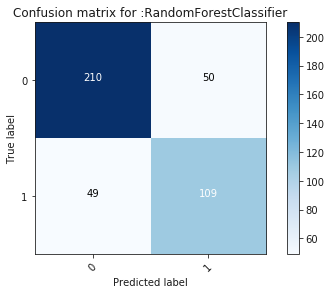

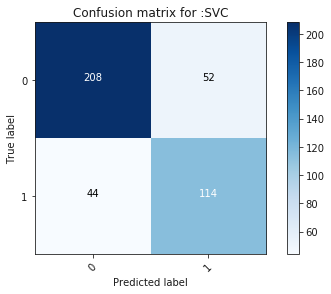

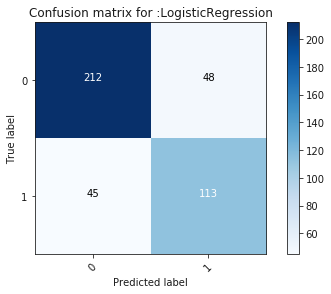

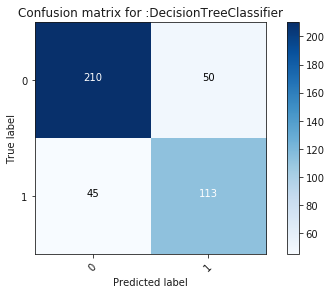

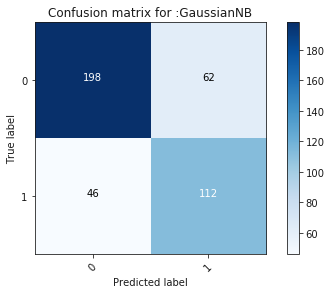

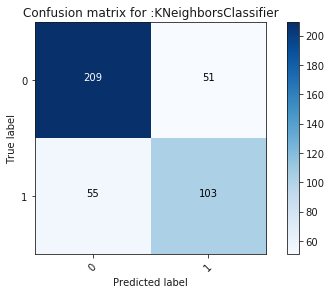

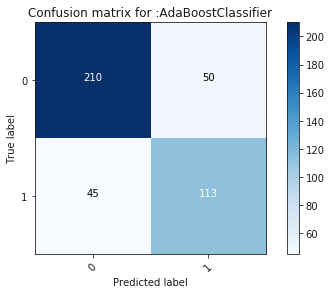

In [36]:
f1_confusion_columns = ["ClassifierName","Performance" ]
f1_confusion_pd = pd.DataFrame(columns=f1_confusion_columns)
class_names = np.array(["0","1"])

for classifier in estimatedclfs:
    classifier.fit(X_KFold,y_KFold)
    classifierName= classifier.__class__.__name__
    predict = classifier.predict(test_feature)
    print("Classification report for classifier %s:\n%s\n"
      % (classifierName, metrics.classification_report(test_y, predict,target_names="Survived")))
    
    cnf_matrix = metrics.confusion_matrix(test_y, predict)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for :%s' % (classifierName))

# Reduce Dimension

In [37]:
#Build up our feature
train_features_reduced = train[["Pclass", "Sex","Age","Has_Cabin", "FamilySize", "Title"]].values
test_feature_reduced = test[["Pclass", "Sex","Age","Has_Cabin", "FamilySize", "Title"]].values

reduced_X_KFold = train_features_reduced
reduced_y_KFold = train["Survived"]
num_test = 0.20 # 80% data for training, 20% data for testing 
r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(reduced_X_KFold, reduced_y_KFold, test_size=num_test, random_state=23)

## Print out accuracy baes on reduced train set

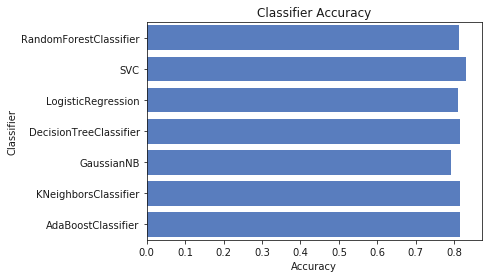

In [38]:
r_trainlog = kfold_test_Accuracy_loop(estimatedclfs,reduced_X_KFold,reduced_y_KFold)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=r_trainlog, color="b")

In [39]:
r_trainlog.head(10)

,Classifier,Accuracy
0,RandomForestClassifier,0.811554
1,SVC,0.829425
2,LogisticRegression,0.809162
3,DecisionTreeClassifier,0.813789
4,GaussianNB,0.791323
5,KNeighborsClassifier,0.815973
6,AdaBoostClassifier,0.813789


In [40]:
#classifiers, estimatedclfs
r_trainpdresult = kfold_test_measurement(estimatedclfs,reduced_X_KFold,reduced_y_KFold)
print("Reduced Feature Training Set Performance")
r_trainpdresult.groupby(['Model name','AverageMethod']).mean()

Reduced Feature Training Set Performance


Accuracy    Recall  Precision  F1_score
Model name             AverageMethod                                         
AdaBoostClassifier     non weighted   0.813282  0.715558   0.786138  0.744538
                       weighted       0.813282  0.813282   0.816755  0.811309
DecisionTreeClassifier non weighted   0.813282  0.715558   0.786138  0.744538
                       weighted       0.813282  0.813282   0.816755  0.811309
GaussianNB             non weighted   0.780947  0.806477   0.683727  0.738627
                       weighted       0.780947  0.780947   0.795362  0.783603
KNeighborsClassifier   non weighted   0.811815  0.706587   0.783556  0.740842
                       weighted       0.811815  0.811815   0.812465  0.809618
LogisticRegression     non weighted   0.808979  0.721060   0.768091  0.741711
                       weighted       0.808979  0.808979   0.810075  0.807701
RandomForestClassifier non weighted   0.806260  0.713956   0.770374  0.737082
                       weighted       0.806260  0.806260   0.808849  0.804568
SVC                    non weighted   0.818799  0.709828   0.801901  0.748434
                       weighted       0.818799  0.818799   0.821637  0.815861

In [41]:
r_trainpdresult.groupby(['Model name','AverageMethod']).describe()

Accuracy                                \
                                        count      mean       std       min   
Model name             AverageMethod                                          
AdaBoostClassifier     non weighted      10.0  0.813282  0.041534  0.774648   
                       weighted          10.0  0.813282  0.041534  0.774648   
DecisionTreeClassifier non weighted      10.0  0.813282  0.041534  0.774648   
                       weighted          10.0  0.813282  0.041534  0.774648   
GaussianNB             non weighted      10.0  0.780947  0.040098  0.704225   
                       weighted          10.0  0.780947  0.040098  0.704225   
KNeighborsClassifier   non weighted      10.0  0.811815  0.046475  0.732394   
                       weighted          10.0  0.811815  0.046475  0.732394   
LogisticRegression     non weighted      10.0  0.808979  0.036523  0.746479   
                       weighted          10.0  0.808979  0.036523  0.746479   
RandomForestClassifier non weighted      10.0  0.806260  0.035046  0.746479   
                       weighted          10.0  0.806260  0.035046  0.746479   
SVC                    non weighted      10.0  0.818799  0.045300  0.760563   
                       weighted          10.0  0.818799  0.045300  0.760563   

                                                                              \
                                           25%       50%       75%       max   
Model name             AverageMethod                                           
AdaBoostClassifier     non weighted   0.780516  0.797242  0.838028  0.887324   
                       weighted       0.780516  0.797242  0.838028  0.887324   
DecisionTreeClassifier non weighted   0.780516  0.797242  0.838028  0.887324   
                       weighted       0.780516  0.797242  0.838028  0.887324   
GaussianNB             non weighted   0.757042  0.788732  0.810593  0.830986   
                       weighted       0.757042  0.788732  0.810593  0.830986   
KNeighborsClassifier   non weighted   0.782375  0.811228  0.841549  0.873239   
                       weighted       0.782375  0.811228  0.841549  0.873239   
LogisticRegression     non weighted   0.792254  0.811228  0.838664  0.859155   
                       weighted       0.792254  0.811228  0.838664  0.859155   
RandomForestClassifier non weighted   0.777778  0.816901  0.830986  0.845070   
                       weighted       0.777778  0.816901  0.830986  0.845070   
SVC                    non weighted   0.792254  0.811228  0.843163  0.887324   
                       weighted       0.792254  0.811228  0.843163  0.887324   

                                     F1_score              ...    Precision  \
                                        count      mean    ...          75%   
Model name             AverageMethod                       ...                
AdaBoostClassifier     non weighted      10.0  0.744538    ...     0.850000   
                       weighted          10.0  0.811309    ...     0.845824   
DecisionTreeClassifier non weighted      10.0  0.744538    ...     0.850000   
                       weighted          10.0  0.811309    ...     0.845824   
GaussianNB             non weighted      10.0  0.738627    ...     0.719086   
                       weighted          10.0  0.783603    ...     0.823567   
KNeighborsClassifier   non weighted      10.0  0.740842    ...     0.839912   
                       weighted          10.0  0.809618    ...     0.847867   
LogisticRegression     non weighted      10.0  0.741711    ...     0.815217   
                       weighted          10.0  0.807701    ...     0.837655   
RandomForestClassifier non weighted      10.0  0.737082    ...     0.836124   
                       weighted          10.0  0.804568    ...     0.838664   
SVC                    non weighted      10.0  0.748434    ...     0.850000   
                       weighted          10.0  0.815861    ...     0

### Performance on Reduced dimension test set

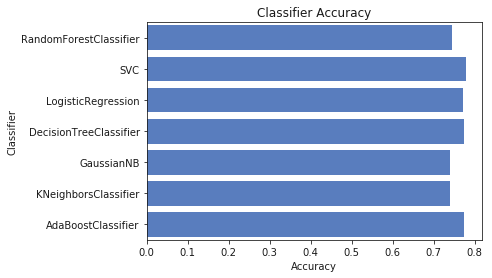

In [42]:
#evaluate on the test set, but only evaluate the accuracy 
reduced_test_X_KFold = test_feature_reduced
reduced_test_y_KFold = test["Survived"]
#don't use kfold, only use 
r_testlog = Accuracy_loop(estimatedclfs,test_feature_reduced,test_y)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=r_testlog, color="b")

In [43]:
test_feature_reduced.shape

(418, 6)

In [44]:
r_testlog

,Classifier,Accuracy
0,RandomForestClassifier,0.744019
1,SVC,0.777512
2,LogisticRegression,0.770335
3,DecisionTreeClassifier,0.772727
4,GaussianNB,0.739234
5,KNeighborsClassifier,0.739234
6,AdaBoostClassifier,0.772727


In [45]:
rf_features = clf_rdf.feature_importances_
adb_features = clf_ABC.feature_importances_

print(rf_features.shape)
print(adb_features.shape)
print(rf_features)
print(adb_features)
print([["Pclass", "Sex","Age","Has_Cabin", "FamilySize", "Title"]])
#print(cols.shape)


(6,)
(6,)
[ 0.13  0.24  0.08  0.06  0.17  0.31]
[ 0.16  0.65  0.04  0.05  0.08  0.01]
[['Pclass', 'Sex', 'Age', 'Has_Cabin', 'FamilySize', 'Title']]


## Print out confusion matrix based on reduced test set

Classification report for classifier RandomForestClassifier:
             precision    recall  f1-score   support

          0       0.81      0.82      0.82       260
          1       0.70      0.69      0.70       158

avg / total       0.77      0.77      0.77       418


Confusion matrix, without normalization
[[214  46]
 [ 49 109]]
Classification report for classifier SVC:
             precision    recall  f1-score   support

          0       0.83      0.82      0.82       260
          1       0.71      0.73      0.72       158

avg / total       0.78      0.78      0.78       418


Confusion matrix, without normalization
[[212  48]
 [ 43 115]]
Classification report for classifier LogisticRegression:
             precision    recall  f1-score   support

          0       0.82      0.81      0.81       260
          1       0.69      0.70      0.70       158

avg / total       0.77      0.77      0.77       418


Confusion matrix, without normalization
[[210  50]
 [ 47 111]]
Cla

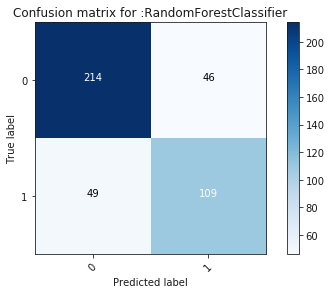

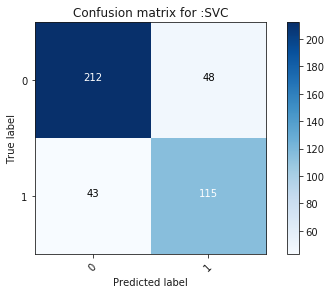

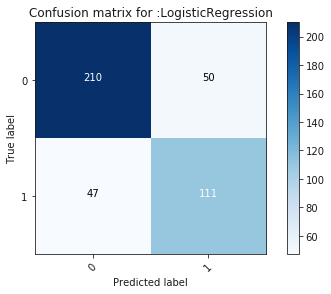

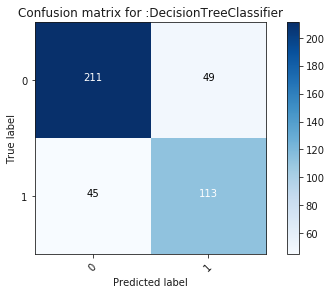

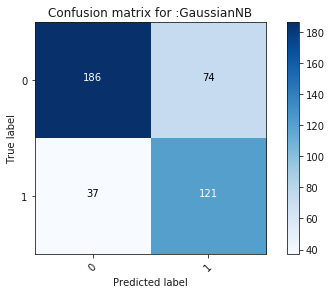

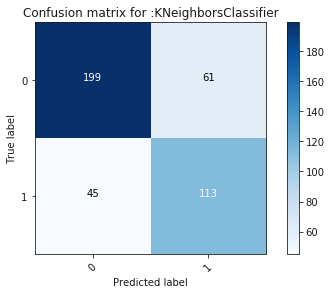

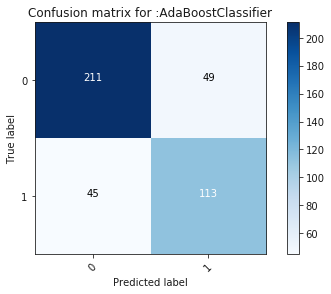

In [52]:
f1_confusion_columns = ["ClassifierName","Performance" ]
f1_confusion_pd = pd.DataFrame(columns=f1_confusion_columns)
class_names = np.array(["0","1"])

for classifier in estimatedclfs:
    classifier.fit(reduced_X_KFold,reduced_y_KFold)
    classifierName= classifier.__class__.__name__
    predict = classifier.predict(test_feature_reduced)
    print("Classification report for classifier %s:\n%s\n"
      % (classifierName, metrics.classification_report(test_y, predict,target_names=class_names)))
    
    cnf_matrix = metrics.confusion_matrix(test_y, predict)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for :%s' % (classifierName))


## Print out some statistic features

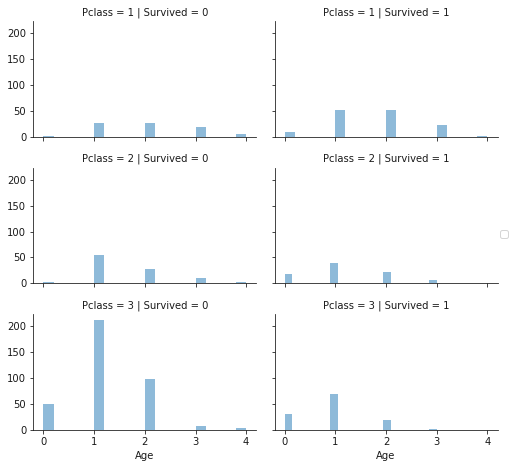

In [50]:
#get some statistic chart from the features
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [51]:
# we need present the feature importance based on different classifier setting
# we need a forloop to present different feature combination related with different classifier settings also significance

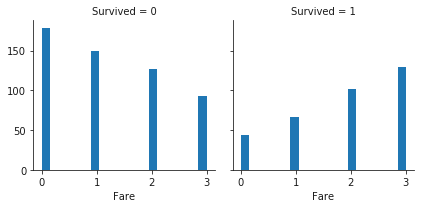

In [161]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

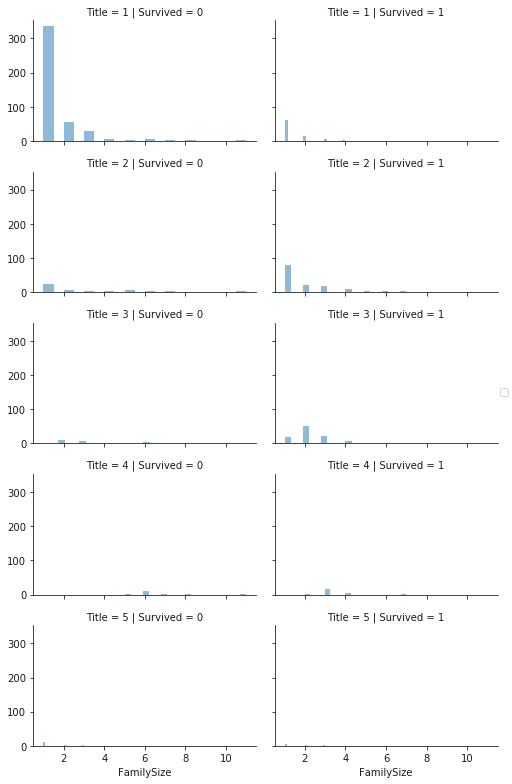

In [162]:
grid = sns.FacetGrid(train, col='Survived', row='Title', size=2.2, aspect=1.6)
grid.map(plt.hist, 'FamilySize', alpha=.5, bins=20)
grid.add_legend();